In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys

#### 샘플1 : 3 * 3 * 1 * 1 이미지 준비, 2 * 2 * 1 필터 준비 

(1, 3, 3, 1)


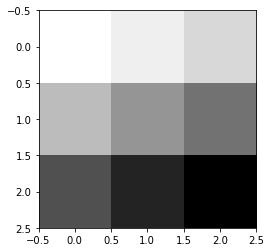

In [2]:
image = np.array([[[[1], [2], [3]], 
                   [[4], [5], [6]],
                   [[7],[8], [9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3, 3), cmap="Greys")

(1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


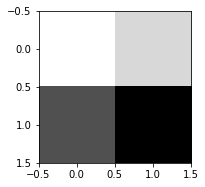

In [3]:
# padding없이 convolution layer 추출

filter = tf.constant([[[[1.]], [[1.]]], 
                      [[[1.]], [[1.]]]])
filter.shape
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="VALID")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i , one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2,2), cmap="Greys")

(1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


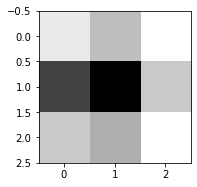

In [4]:
# padding을 이용한 convolution layer 추출

filter = tf.constant([[[[1.]], [[1.]]], 
                      [[[1.]], [[1.]]]])
filter.shape
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i , one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap="Greys")

(1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


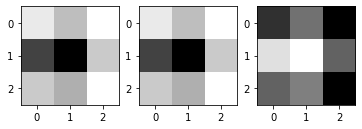

In [5]:
# 3개의 필터 사용(2*2*1*3)

filter = tf.constant([[[[1., 10, -1]], [[1., 10, -1]]], 
                      [[[1., 10, -1]], [[1., 10, -1]]]])
filter.shape
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i , one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap="Greys")

In [6]:
# MaxPooling(2*2), padding 없이

image2 = tf.constant([[[[4], [3]], 
                       [[2], [1]]]])

pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], 
                     padding="VALID")

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 1, 1, 1)
[[[[4]]]]


In [7]:
# MaxPooling(2*2), padding 사용

image2 = tf.constant([[[[4], [3]], 
                       [[2], [1]]]])

pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], 
                     padding="SAME")

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


### MNIST를 이용한 CNN

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official

(784,)


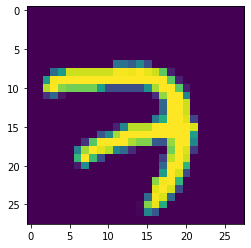

In [10]:
# 데이터 확인
img = mnist.train.images[0]
print(img.shape)

plt.imshow(img.reshape(28, 28))

In [11]:
tf.reset_default_graph()

# 입력값 준비
X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

In [12]:
# 첫번째 Convolution Layer 준비
# 필터 : 크기는 3*3, 갯수는 32, 색상수는 1

X_img = tf.reshape(X, [-1, 28, 28, 1])
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding="SAME")
print(L1)
L1 = tf.nn.relu(L1)
print(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(L1)

Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


In [13]:
# 두 번째 Convolution Layer 준비
# 필터 : 크기는 3*3, 갯수 64, 색상수는 1

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding="SAME")
print(L2)
L2 = tf.nn.relu(L2)
print(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(L2)

Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


#### Simple FC

In [14]:
################## Fully Connected Layer (Dense Layer) #################

### hyper parameter 준비
learning_rate = 0.001
training_epochs = 20
batch_size = 500

### tensor graph 작성
L2 = tf.reshape(L2, [-1, 7*7*64])

W3 = tf.Variable(tf.random_normal([7*7*64, 10]))
b = tf.Variable(tf.random_normal([10]))

# 비용 계산
logit = tf.matmul(L2, W3) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=y))

# 최저 비용 구하기
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### tensor graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_ys})
        avg_cost += c/total_batch
        
    print("Epoch:", "%04d"%(epoch+1), "cost=", "{:.9f}".format(avg_cost))

Epoch: 0001 cost= 0.723661991
Epoch: 0002 cost= 0.178065440
Epoch: 0003 cost= 0.122264901
Epoch: 0004 cost= 0.094813403
Epoch: 0005 cost= 0.079643511
Epoch: 0006 cost= 0.070893042
Epoch: 0007 cost= 0.062309487
Epoch: 0008 cost= 0.055871206
Epoch: 0009 cost= 0.049974251
Epoch: 0010 cost= 0.046434582
Epoch: 0011 cost= 0.043122147
Epoch: 0012 cost= 0.040051523
Epoch: 0013 cost= 0.036788579


KeyboardInterrupt: 

In [15]:
# 정확도
is_correct = tf.equal(tf.argmax(logit, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images,
                                             y:mnist.test.labels}))

정확도 :  0.9833


#### Deep FC

+ 레이어 총 3개 사용, 입출력 갯수 128개 사용
+ xavier 초기화
+ dropout 사용
+ training_epoch : 15
+ batch_size : 100

In [10]:
### hyper parameter 준비
learning_rate = 0.001
training_epochs = 15
batch_size = 100
prob = tf.placeholder(tf.float32)

### 첫번째 레이어
L3 = tf.reshape(L2, [-1, 7*7*64])

W3 = tf.get_variable("W3", shape=[7*7*64, 128], 
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([128]))
logit3 = tf.matmul(L3, W3) + b3
L3 = tf.nn.relu(logit3)
L3 = tf.nn.dropout(L3, keep_prob=prob)

### 두번째 레이어
W4 = tf.get_variable("W4", shape=[128, 128], 
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([128]))
logit4 = tf.matmul(L3, W4) + b4
L4 = tf.nn.relu(logit4)
L4 = tf.nn.dropout(L4, keep_prob=prob)

### 세번째 레이어
W5 = tf.get_variable("W5", shape=[128, 10], 
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logit5 = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit5,
                                                                labels=y))

# 최저 비용 구하기
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### tensor graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_ys,
                                                 prob:0.7})
        avg_cost += c/total_batch
        
    print("Epoch:", "%04d"%(epoch+1), "cost=", "{:.9f}".format(avg_cost))
   

 ### 정확도
is_correct = tf.equal(tf.argmax(logit5, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images,
                                             y:mnist.test.labels, prob:1}))

Epoch: 0001 cost= 0.466600628
Epoch: 0002 cost= 0.148043171
Epoch: 0003 cost= 0.108409341
Epoch: 0004 cost= 0.088602800
Epoch: 0005 cost= 0.071219196
Epoch: 0006 cost= 0.063818301
Epoch: 0007 cost= 0.055499472
Epoch: 0008 cost= 0.048639586
Epoch: 0009 cost= 0.043806544
Epoch: 0010 cost= 0.041516048
Epoch: 0011 cost= 0.035260138
Epoch: 0012 cost= 0.034086327
Epoch: 0013 cost= 0.029076980
Epoch: 0014 cost= 0.028816646
Epoch: 0015 cost= 0.025584352
정확도 :  0.9908


### 교통 표지판 인식

+ https://benchmark.ini.rub.de/gtsrb_dataset.html
    + GTSRB_Final_Test_Images.zip
    + GTSRB_Final_Training_Images.zip
    
    
+ 이미지(32 * 32) > Conv Layer1(Pooling) > Conv Layer2(Pooling) > FC

#### 이미지 전처리

In [16]:
import glob
from skimage.color import rgb2lab
from skimage.transform import resize
from collections import namedtuple
np.random.seed(101)

In [17]:
# 상수 정의
N_CLASSES = 43
RESIZED_IMAGE = (32, 32)

In [18]:
Dataset = namedtuple("Dataset", ["X", 'y'])
dir(Dataset)

['X',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'count',
 'index',
 'y']

In [23]:
def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

# 이미지 크기를 재조정하고 색상은 회색조로 변경, one-hot encoding
def read_dataset_ppm(rootpath, n_labels, resize_to):
    images = []
    labels = []
    
    for c in range(n_labels):
        full_path = rootpath + "/" + format(c, '05d') + "/"
        
        for img_name in glob.glob(full_path + "*.ppm"):
            img = plt.imread(img_name).astype(np.float32)
            img = rgb2lab(img/255.0)[:, :, 0]
            
            img = resize(img, resize_to, mode="reflect")
            
            label = np.zeros((n_labels,), dtype=np.float32 )
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)

    return Dataset(X=to_tf_format(images), y=np.array(labels))
#------------------------------------
ds = read_dataset_ppm("C:/Users/user/Documents/jun/AI/GTSRB/Final_Training/Images", N_CLASSES, 
                      RESIZED_IMAGE)

print(ds.X.shape)
print(ds.y.shape)

KeyboardInterrupt: 

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


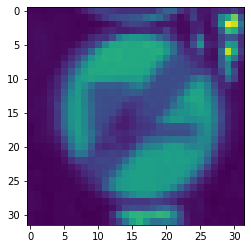

In [24]:
# 데이터 확인
plt.imshow(ds.X[0,:,:,:].reshape(RESIZED_IMAGE))
print(ds.y[0, :])

plt.imshow(ds.X[-1,:,:,:].reshape(RESIZED_IMAGE))
print(ds.y[-1, :])

In [25]:
# 훈련 데이터와 테스트 데이터 분리

from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test= train_test_split(range(ds.X.shape[0]), 
#                                                   ds.y, test_size=0.25, 
#                                                   random_state=101)

#np.array(X_train).shape

idx_train, idx_test= train_test_split(range(ds.X.shape[0]), test_size=0.25, 
                                      random_state=101)

X_train = ds.X[idx_train, :, :, :]
X_test = ds.X[idx_test, :, :, :]
y_train = ds.y[idx_train, :]
y_test = ds.y[idx_test, :]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29406, 32, 32, 1)
(9803, 32, 32, 1)
(29406, 43)
(9803, 43)


#### 훈련(학습)과 예측

In [26]:
### 미니배치 준비
def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0]
    n_samples = X.shape[0]
    
    if shuffle:
        idx = np.random.permutation(n_samples)
    else:
        idx = list(range(n_samples))
        
    for i in range(int(np.ceil(n_samples/batch_size))):
        from_idx = i * batch_size
        to_idx = (i+1) * batch_size
        yield X[idx[from_idx : to_idx], :, :, :], y[idx[from_idx : to_idx], :]
    

In [27]:
### 미니배치 함수 테스트
for i in minibatcher(X_train, y_train, 10000, True):
    print(i[0].shape, i[1].shape)

(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(9406, 32, 32, 1) (9406, 43)


In [28]:
def fc_no_activation_layer(in_tensors, n_units):
    W = tf.get_variable("fc_W", shape=[in_tensors.get_shape()[1], n_units], 
                     initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("fc_b", shape=[n_units],
                       initializer=tf.constant_initializer(0.0))
    
    return tf.matmul(in_tensors, W) + b

In [29]:
def fc_layer(in_tensors, n_units):
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units))

In [30]:
def conv_layer(in_tensors, kernel_size, n_units):
    W = tf.get_variable("conv_W", [kernel_size, kernel_size, 
                                  in_tensors.get_shape()[3], n_units], 
                     initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("conv_b", shape=[n_units],
                       initializer=tf.constant_initializer(0.0))
    
    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors, W, [1, 1, 1, 1], "SAME") + b)

In [31]:
def maxpool_layer(in_tensors, sampling):
    return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], 
                          [1, sampling, sampling, 1], "SAME")

In [32]:
def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda:tf.nn.dropout(in_tensors, keep_proba),
                  lambda:in_tensors)

#### Model Specification

+ 2차원 convolution 5 * 5, 32 필터
+ 2차원 convolution 5 * 5, 64 필터
+ 평면화 계층(Flat Layer)
+ Full Connected Layer, 1024개의 unit
+ Dropout 40%
+ Softmax

In [33]:
def model(in_tensors, is_training):
    # First Layer : 5*5 2d convolution layer, 32filters, 2x maxpool, 20% dropout
    with tf.variable_scope("L1"):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        l1_out = dropout(l1, 0.8, is_training)
    
    # Second Layer : 5*5 2d conv layer, 64filters, 2x maxpool, 20% dropout
    with tf.variable_scope("L2"):
        l2 = maxpool_layer(conv_layer(in_tensors, 5, 64), 2)
        l2_out = dropout(l2, 0.8, is_training)
        
    # Flat Layer
    with tf.variable_scope("flatten"):
        l2_out_flat = tf.layers.flatten(l2_out)
        
    # Fully Connected Layer, 1024 neurons, 40% dropout
    with tf.variable_scope("L3"):
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out = dropout(l3, 0.6, is_training)
        
    # output
    with tf.variable_scope("out"):
        out_tensors = fc_no_activation_layer(l3_out, N_CLASSES)
    
    return out_tensors

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
def train_model(X_train, y_train, learning_rate, max_epochs, batch_size):
    in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, 
                                                           RESIZED_IMAGE[0],
                                                           RESIZED_IMAGE[1],1))
    in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASSES))
    is_training = tf.placeholder(tf.bool)
    
    logit = model(in_X_tensors_batch, is_training)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=in_y_tensors_batch))
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(max_epochs):
            print("Epoch=", epoch)
            tf_score = []
            
            for mb in minibatcher(X_train, y_train, batch_size, shuffle=True):
                _, c = sess.run([train, cost], 
                                feed_dict={in_X_tensors_batch:mb[0],
                                                  in_y_tensors_batch:mb[1],
                                                  is_training:True})
                tf_score.append(c)
                
            print(" train loss score=", np.mean(tf_score))
        
        
        # 훈련이 끝난 후 테스트
        print("TEST SET PERFORMANCE")
            
        out_y_pred = tf.nn.softmax(logit)
        y_test_pred, test_cost = sess.run([out_y_pred, cost], 
                                          feed_dict={in_X_tensors_batch:X_test,
                                                  in_y_tensors_batch:y_test,
                                                  is_training:False})
            
        print(" test_loss_score=", test_cost)
        y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
        y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
        print(classification_report(y_test_true_classified, y_test_pred_classified))
    
        cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)
    
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        plt.tight_layout()
        plt.show()
    
        # And the log2 version, to enphasize the misclassifications
        plt.imshow(np.log2(cm + 1), interpolation='nearest', cmap=plt.get_cmap("tab20"))
        plt.colorbar()
        plt.tight_layout()
        plt.show()

In [36]:
tf.reset_default_graph()
train_model(X_train, y_train, 0.001, 10, 256)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Epoch= 0
 train loss score= 14.751022
Epoch= 1
 train loss score= 0.8720121
Epoch= 2
 train loss score= 0.5362196
Epoch= 3
 train loss score= 0.38509822
Epoch= 4
 train loss score= 0.28633818
Epoch= 5
 train loss score= 0.26213452
Epoch= 6
 train loss score= 0.23379408
Epoch= 7
 train loss score= 0.18945366
Epoch= 8


KeyboardInterrupt: 

In [ ]:
"""
1. 일부 CNN계층과 FC계층을 추가를 통해서 성능이 어떻게 변하는지 확인
2. dropout의 비율을 변경해보면서 결과가 과소적합 또는 과대적합되는지 확인
3. 전체 epoch수와 batch size도 변경해서 결과 확인
4. 실제 테스트 이미지를 통해 사용할 수 있는 프로그램 작성
"""